In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [3]:
df = pd.read_csv("singindex_ai_data.csv", index_col=0)
metadf = pd.read_csv("singindex_ai_metadata.csv")

In [4]:
df.describe()

,Artificial intelligence (AI) startup funding worldwide from 2011 to 2021 (in billion U.S. dollars),Revenues from the Ai software market worldwide from 2018 to 2025 (In billions USD),AI funding investment in the United States from 2011 to 2019 (million USD),Global investment in AI,US public investment on AI (USD),Number of all AI paper of all doc type on Microsoft Academic Graph,AI paper ratio,Number of peer-reviewed AI publications 2000-2019 (in thousands) (visual estimate),Number of AI Journal Publications (in thousands) (visual estimate),Number of AI conference publications (in thousands),...,False Non-Match rate (FNMR; Log Scale) of NIST FRVT 1:1 VERIFICATION ACCURACY over years (MUGSHOT Photos FNMR@ FMR ? 0.00001),SuperGLUE English language score over time,SQUAD 1.1 performance over time (score),SQUAD 2.0 performance over time (score),Number of independent machine translation services (commercial),Visual Question answering challenge accuracy over time,Visual commonsense reasoning (Q->AR Score) over time,"LIBRISPEECH word error rate, test clean",VOXCELEB equal error rate (percentage),"Number of undergraduate courses that teach students the skills necessary to build or deploy a practical AI model, academic year 2016-2020 (18 university in 9 countries)"
count,11.000000,8.000000,9.000000,6.000000e+00,2.100000e+01,31.000000,31.000000,20.000000,21.000000,31.000000,...,5.000000,3.000000,5.000000,3.000000,4.000000,6.000000,3.00000,5.000000,5.000000,4.000000
mean,15.002727,53.108750,4809.555556,2.691118e+10,3.252119e+08,96499.387097,0.021750,39.000000,41.619048,24441.451613,...,0.177740,74.700000,85.581800,81.933333,35.250000,67.595000,53.60000,3.486000,3.608000,142.500000
std,14.418777,41.283101,5205.976664,1.437599e+10,4.924716e+08,63673.208915,0.005766,27.657682,16.399623,15476.246304,...,0.263214,26.158746,11.544898,13.868786,9.569918,8.008387,14.68094,1.587224,2.645424,44.814432
min,0.660000,10.100000,282.000000,7.951768e+09,1.860400e+04,19040.000000,0.011640,10.000000,16.000000,3885.000000,...,0.003700,44.500000,67.700000,66.250000,26.000000,55.370000,44.00000,1.400000,0.580000,100.000000
25%,2.750000,20.615000,1147.000000,1.553237e+10,2.989078e+07,36761.500000,0.016472,22.250000,26.000000,9012.500000,...,0.006100,66.900000,81.257000,76.610000,27.500000,63.147500,45.15000,2.840000,2.840000,118.750000
50%,7.800000,43.070000,3297.000000,2.978909e+10,1.598749e+08,88109.000000,0.023820,34.500000,46.000000,24411.000000,...,0.027100,89.300000,88.493000,86.970000,35.500000,68.480000,46.30000,3.060000,2.870000,132.500000
75%,26.150000,76.807500,5425.000000,3.813785e+10,2.988635e+08,152008.000000,0.025801,41.500000,52.000000,39760.500000,...,0.236800,89.800000,95.080000,89.775000,43.250000,73.722500,58.40000,4.800000,3.950000,156.250000
max,38.000000,126.000000,16500.000000,4.223621e+10,1.836983e+09,230567.000000,0.032942,125.000000,78.000000,48044.000000,...,0.615000,90.300000,95.379000,92.580000,44.000000,76.400000,70.50000,5.330000,7.800000,205.000000


## Pre-processing

### Build index components

In [5]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [7]:
df[index_comps].to_csv("singindex_ai_raw_components.csv")
df_index.to_csv("singindex_ai_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_ai_new_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [8]:
from scipy import interpolate

In [14]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=1)

<AxesSubplot:xlabel='Year'>

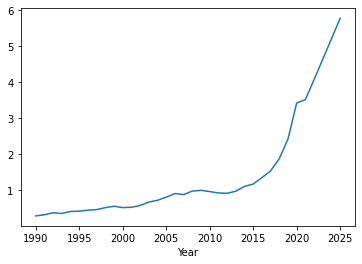

In [15]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [17]:
# model index to extrapolate (exclude 2020 data)
s_model = interpolate.interp1d(singindex_historic.index, singindex_historic.values, fill_value="extrapolate")

<AxesSubplot:>

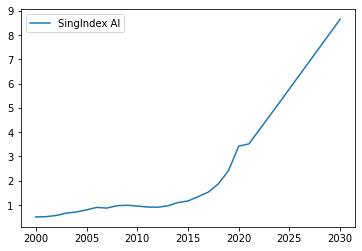

In [19]:
singindex = pd.DataFrame({"SingIndex AI": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

In [20]:
singindex

,SingIndex AI
2000,0.512405
2001,0.522044
2002,0.570411
2003,0.666262
2004,0.716608
2005,0.802393
2006,0.902520
2007,0.876559
2008,0.972310
2009,0.993190


### Export

In [21]:
df_interp_index.to_csv("singindex_ai_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_ai_avg_interpolate.csv")
singindex.to_csv("singindex_ai_avg_extrapolate_2000_2030.csv")